In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

## Visualizing Data

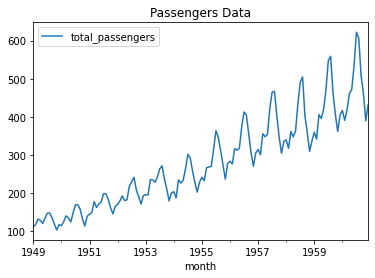

In [87]:
df=pd.read_csv("../datasets/airline-passengers.csv", index_col='month', parse_dates=True)
df[['total_passengers']].plot(title='Passengers Data')
plt.show()
#Since there is trend and seasonality in this series TES and SARIMA models can be choosen

In [13]:
print(df.index)
df.index.freq = "MS"
print(df.index)
train = df[:120]
test = df[120:]
len(test)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')


24

## Triple Exponential Smoothing (Holt-Winters)

In [44]:
tes_model=ExponentialSmoothing(train,trend="mul"
                               ,seasonal="mul",
                               seasonal_periods=12).fit(smoothing_level=0.1,
                                                        smoothing_seasonal=0.1,
                                                       smoothing_trend=0.1)


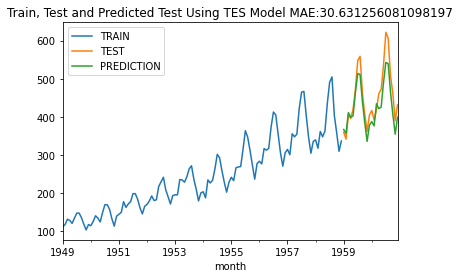

In [57]:
y_pred=tes_model.forecast(24)
def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    mae=mean_absolute_error(test,y_pred)
    plt.title("Train, Test and Predicted Test Using "+label+" MAE:"+str(mae))
    plt.show()
plot_prediction(y_pred,"TES Model")

## Hyperparameter Optimization

In [53]:
alphas = betas = gammas = np.arange(0.20, 1, 0.10)

abg = list(itertools.product(alphas, betas, gammas))


def tes_optimizer(train, abg, step=24):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)

[0.2, 0.2, 0.2, 42.51]
[0.2, 0.2, 0.3, 42.19]
[0.2, 0.2, 0.4, 43.45]
[0.2, 0.2, 0.5, 44.56]
[0.2, 0.2, 0.6, 44.15]
[0.2, 0.2, 0.7, 41.44]
[0.2, 0.2, 0.8, 36.31]
[0.2, 0.2, 0.9, 30.33]
[0.2, 0.3, 0.2, 33.38]
[0.2, 0.3, 0.3, 31.96]
[0.2, 0.3, 0.4, 33.57]
[0.2, 0.3, 0.5, 34.05]
[0.2, 0.3, 0.6, 29.82]
[0.2, 0.3, 0.7, 20.31]
[0.2, 0.3, 0.8, 14.65]
[0.2, 0.3, 0.9, 16.27]
[0.2, 0.4, 0.2, 14.97]
[0.2, 0.4, 0.3, 13.69]
[0.2, 0.4, 0.4, 17.27]
[0.2, 0.4, 0.5, 18.15]
[0.2, 0.4, 0.6, 12.45]
[0.2, 0.4, 0.7, 12.76]
[0.2, 0.4, 0.8, 14.31]
[0.2, 0.4, 0.9, 16.71]
[0.2, 0.5, 0.2, 17.16]
[0.2, 0.5, 0.3, 14.34]
[0.2, 0.5, 0.4, 10.8]
[0.2, 0.5, 0.5, 14.85]
[0.2, 0.5, 0.6, 12.76]
[0.2, 0.5, 0.7, 14.1]
[0.2, 0.5, 0.8, 20.72]
[0.2, 0.5, 0.9, 32.63]
[0.2, 0.6, 0.2, 40.38]
[0.2, 0.6, 0.3, 23.27]
[0.2, 0.6, 0.4, 11.91]
[0.2, 0.6, 0.5, 21.93]
[0.2, 0.6, 0.6, 25.36]
[0.2, 0.6, 0.7, 31.64]
[0.2, 0.6, 0.8, 40.95]
[0.2, 0.6, 0.9, 50.9]
[0.2, 0.7, 0.2, 53.52]
[0.2, 0.7, 0.3, 20.3]
[0.2, 0.7, 0.4, 17.89]
[0.2, 0.7, 0.5,

[0.7, 0.6, 0.3, 152.81]
[0.7, 0.6, 0.4, 149.1]
[0.7, 0.6, 0.5, 132.04]
[0.7, 0.6, 0.6, 117.18]
[0.7, 0.6, 0.7, 125.57]
[0.7, 0.6, 0.8, 134.31]
[0.7, 0.6, 0.9, 256.5]
[0.7, 0.7, 0.2, 153.41]
[0.7, 0.7, 0.3, 156.6]
[0.7, 0.7, 0.4, 149.12]
[0.7, 0.7, 0.5, 128.79]
[0.7, 0.7, 0.6, 121.91]
[0.7, 0.7, 0.7, 138.98]
[0.7, 0.7, 0.8, 409.47]
[0.7, 0.7, 0.9, 429.4]
[0.7, 0.8, 0.2, 155.38]
[0.7, 0.8, 0.3, 156.26]
[0.7, 0.8, 0.4, 144.48]
[0.7, 0.8, 0.5, 122.1]
[0.7, 0.8, 0.6, 128.88]
[0.7, 0.8, 0.7, 147.19]
[0.7, 0.8, 0.8, 434.41]
[0.7, 0.8, 0.9, 459.08]
[0.7, 0.9, 0.2, 155.49]
[0.7, 0.9, 0.3, 154.22]
[0.7, 0.9, 0.4, 137.36]
[0.7, 0.9, 0.5, 117.94]
[0.7, 0.9, 0.6, 139.13]
[0.7, 0.9, 0.7, 442.03]
[0.7, 0.9, 0.8, 3.334680929610201e+21]
[0.7, 0.9, 0.9, 1512.29]
[0.8, 0.2, 0.2, 83.08]
[0.8, 0.2, 0.3, 84.34]
[0.8, 0.2, 0.4, 84.97]
[0.8, 0.2, 0.5, 81.39]
[0.8, 0.2, 0.6, 73.49]
[0.8, 0.2, 0.7, 64.98]
[0.8, 0.2, 0.8, 61.27]
[0.8, 0.2, 0.9, 61.48]
[0.8, 0.3, 0.2, 103.07]
[0.8, 0.3, 0.3, 105.46]
[0.8, 0.3, 0.

### Final Model

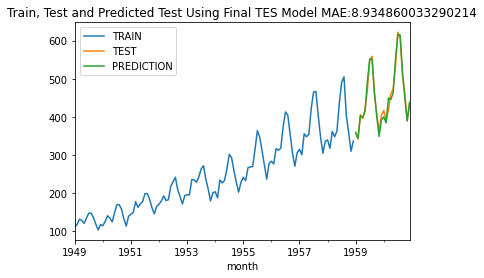

In [58]:
final_tes_model=ExponentialSmoothing(train,trend="mul",seasonal="mul",seasonal_periods=12).fit(smoothing_level=0.2,
                                                                                               smoothing_slope=0.8,
                                                                                              smoothing_seasonal=0.3)
y_pred=final_tes_model.forecast(24)
plot_prediction(y_pred,"Final TES Model")

## SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)

In [63]:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_model=model.fit(disp=0)

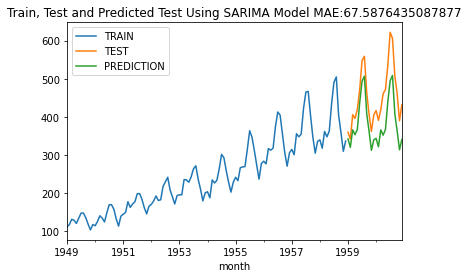

In [75]:
y_pred_test = sarima_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)
plot_prediction(y_pred,"SARIMA Model")

## Hyperparameter Optimization

In [68]:
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonable_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [69]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [70]:
best_order,best_seasonal_order=sarima_optimizer_mae(train,pdq,seasonable_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.20954586119325
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - MAE:277.6695607909334
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972634133364
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - MAE:69.69332869113818
SARIMA(0, 0, 0)x(0, 2, 0, 12)12 - MAE:52.79166666667044
SARIMA(0, 0, 0)x(0, 2, 1, 12)12 - MAE:29.299046007596758
SARIMA(0, 0, 0)x(0, 2, 2, 12)12 - MAE:29.15607919127599
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93611477700983
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79702343790413
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - MAE:73.9444005064048
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.599738719849256
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.62197061098693
SARIMA(0, 0, 0)x(1, 1, 2, 12)12 - MAE:30.951107962347166
SARIMA(0, 0, 0)x(1, 2, 0, 12)12 - MAE:37.01918835417839
SARIMA(0, 0, 0)x(1, 2, 1, 12)12 - MAE:29.16758232177609
SARIMA(0, 0, 0)x(1, 2, 2, 12)12 - MAE:26.914121504394767
SARIMA(0, 0

SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - MAE:66.55112236335741
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - MAE:54.721605350657704
SARIMA(0, 1, 2)x(1, 2, 0, 12)12 - MAE:80.80242006599343
SARIMA(0, 1, 2)x(1, 2, 1, 12)12 - MAE:54.30969042963619
SARIMA(0, 1, 2)x(1, 2, 2, 12)12 - MAE:54.22262820061324
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - MAE:69.95317042163633
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - MAE:70.25365848087722
SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - MAE:70.20997521794241
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - MAE:66.35545537242238
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - MAE:55.700116729888684
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - MAE:61.89616333694075
SARIMA(0, 1, 2)x(2, 2, 0, 12)12 - MAE:73.76135584050935
SARIMA(0, 1, 2)x(2, 2, 1, 12)12 - MAE:54.2955530294195
SARIMA(0, 1, 2)x(2, 2, 2, 12)12 - MAE:53.70040707997868
SARIMA(0, 2, 0)x(0, 0, 0, 12)12 - MAE:224.5833333332911
SARIMA(0, 2, 0)x(0, 0, 1, 12)12 - MAE:82.27605835691121
SARIMA(0, 2, 0)x(0, 0, 2, 12)12 - MAE:98.80679971969346
SARIMA(0, 2, 0)x(0, 1, 0, 12)12 - MAE:132.74999

SARIMA(1, 0, 1)x(2, 2, 1, 12)12 - MAE:41.51634131691991
SARIMA(1, 0, 1)x(2, 2, 2, 12)12 - MAE:42.48655825578817
SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - MAE:121.59172934579856
SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - MAE:143.2548731236095
SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - MAE:129.66687080535942
SARIMA(1, 0, 2)x(0, 1, 0, 12)12 - MAE:69.61438570753111
SARIMA(1, 0, 2)x(0, 1, 1, 12)12 - MAE:69.01836358803007
SARIMA(1, 0, 2)x(0, 1, 2, 12)12 - MAE:66.67223885021976
SARIMA(1, 0, 2)x(0, 2, 0, 12)12 - MAE:67.73046251292745
SARIMA(1, 0, 2)x(0, 2, 1, 12)12 - MAE:44.54032624824259
SARIMA(1, 0, 2)x(0, 2, 2, 12)12 - MAE:39.022782260046434
SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - MAE:79.09055775996956
SARIMA(1, 0, 2)x(1, 0, 1, 12)12 - MAE:77.98489930357309
SARIMA(1, 0, 2)x(1, 0, 2, 12)12 - MAE:76.1700747390584
SARIMA(1, 0, 2)x(1, 1, 0, 12)12 - MAE:68.79674297940473
SARIMA(1, 0, 2)x(1, 1, 1, 12)12 - MAE:57.33894635443525
SARIMA(1, 0, 2)x(1, 1, 2, 12)12 - MAE:47.94597082464063
SARIMA(1, 0, 2)x(1, 2, 0, 12)12 - MAE:54.93222

SARIMA(1, 2, 1)x(1, 0, 2, 12)12 - MAE:69.5970107225118
SARIMA(1, 2, 1)x(1, 1, 0, 12)12 - MAE:67.33324050891332
SARIMA(1, 2, 1)x(1, 1, 1, 12)12 - MAE:67.58911011520964
SARIMA(1, 2, 1)x(1, 1, 2, 12)12 - MAE:67.83370619049604
SARIMA(1, 2, 1)x(1, 2, 0, 12)12 - MAE:91.50799717300508
SARIMA(1, 2, 1)x(1, 2, 1, 12)12 - MAE:76.33825590564317
SARIMA(1, 2, 1)x(1, 2, 2, 12)12 - MAE:69.47047219902815
SARIMA(1, 2, 1)x(2, 0, 0, 12)12 - MAE:69.40326190371712
SARIMA(1, 2, 1)x(2, 0, 1, 12)12 - MAE:69.98601068323781
SARIMA(1, 2, 1)x(2, 0, 2, 12)12 - MAE:70.01047620889825
SARIMA(1, 2, 1)x(2, 1, 0, 12)12 - MAE:67.63091990931902
SARIMA(1, 2, 1)x(2, 1, 1, 12)12 - MAE:56.65882281071837
SARIMA(1, 2, 1)x(2, 1, 2, 12)12 - MAE:72.27058583619491
SARIMA(1, 2, 1)x(2, 2, 0, 12)12 - MAE:86.37716252877262
SARIMA(1, 2, 1)x(2, 2, 1, 12)12 - MAE:75.7841737223432
SARIMA(1, 2, 1)x(2, 2, 2, 12)12 - MAE:76.75129351036998
SARIMA(1, 2, 2)x(0, 0, 0, 12)12 - MAE:71.49684405874545
SARIMA(1, 2, 2)x(0, 0, 1, 12)12 - MAE:93.822960900

SARIMA(2, 1, 0)x(2, 2, 1, 12)12 - MAE:54.687134805322955
SARIMA(2, 1, 0)x(2, 2, 2, 12)12 - MAE:54.30171153016448
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - MAE:75.66464110306931
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - MAE:82.88158344890054
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - MAE:73.25535266156398
SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - MAE:69.73672142370762
SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - MAE:68.31736810049182
SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - MAE:45.22369350092517
SARIMA(2, 1, 1)x(0, 2, 0, 12)12 - MAE:80.71124328872614
SARIMA(2, 1, 1)x(0, 2, 1, 12)12 - MAE:53.37315751125262
SARIMA(2, 1, 1)x(0, 2, 2, 12)12 - MAE:52.613430794287346
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - MAE:50.78101226308791
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - MAE:49.142887905722915
SARIMA(2, 1, 1)x(1, 0, 2, 12)12 - MAE:50.75570372058386
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - MAE:67.90264691935623
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - MAE:67.5478636111318
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - MAE:52.199783929591604
SARIMA(2, 1, 1)x(1, 2, 0, 12)12 - MAE:81.3559

## Final Model

In [72]:
final_model=SARIMAX(train,order=best_order,seasonal_order=best_seasonal_order)
final_sarima_model=final_model.fit(disp=0)

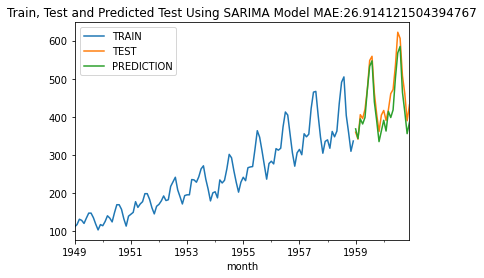

In [77]:
y_pred=final_sarima_model.get_forecast(steps=24)
y_pred = y_pred.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)
plot_prediction(y_pred,"SARIMA Model")

## FINAL MODEL
Since Triple Exponential Smoothing method gives less MAE value I will use it in my final model

In [78]:
final_model=ExponentialSmoothing(df,trend="mul",seasonal="mul",seasonal_periods=12).fit(smoothing_level=0.2,
                                                                                               smoothing_slope=0.8,
                                                                                              smoothing_seasonal=0.3)

In [80]:
y_pred=final_model.forecast(12)
y_pred

1961-01-01    443.237974
1961-02-01    420.122966
1961-03-01    480.943772
1961-04-01    493.934592
1961-05-01    514.124542
1961-06-01    596.012150
1961-07-01    685.730019
1961-08-01    684.574392
1961-09-01    575.564223
1961-10-01    510.358740
1961-11-01    440.673218
1961-12-01    487.739432
Freq: MS, dtype: float64

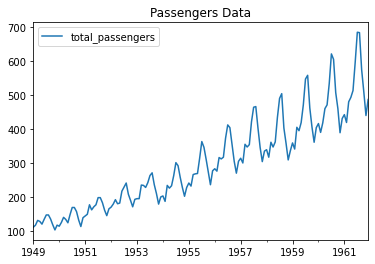

In [97]:
y_pred=pd.DataFrame(y_pred,columns=["total_passengers"])
df=df.append(y_pred)
df[['total_passengers']].plot(title='Passengers Data')
plt.show()